#### 정규화하지 않는 데이터로 모델링

In [10]:
import pandas as pd

# 사용할 모델
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from freeman.plt_setting import plt_settings
from freeman.evaluation import regression_evaluation, f_importances, plot_actual_pred
from freeman.aiddd.data_manager import read_data

plt_settings()

In [11]:
# dtype_options = {'pole12_comp_no': str, 'pole12_xy': object}
df_X = read_data('fa-modeling-X')
df_y = read_data('fa-modeling-y')

In [12]:
training_columns = df_X.columns

In [13]:
X_train, X_test, y_train, y_test = \
    train_test_split(df_X, df_y, test_size=0.1)

In [14]:
SEED = 123
ml_models = {
    'LASSO': Lasso(),
    'RIDGE': Ridge(),
    'KNR': KNeighborsRegressor(),
    'DTR': DecisionTreeRegressor(),
    'RFR': RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=SEED),
    'GBR': GradientBoostingRegressor(),
    'EN': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=SEED),
    'XGR': XGBRegressor(eta=0.01, n_estimators=100, n_jobs=-1),
}

In [15]:
def model_fit_and_evaluation(model_key, display_start=0, display_size=50):
    model = ml_models[model_key]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f'Evaluation: {model_key}')
    evaluation_value = regression_evaluation(y_test, predictions)
    evaluation_values.append(evaluation_value)
    model_names.append(model_key)
    try:
        f_importances(model, training_columns, model_key)
    except AttributeError as e:
        print(f'`{model_key}` object has no attribute `feature_importances_`')
    plot_actual_pred(
        y_test[display_start:display_start+display_size],
        predictions[display_start:display_start+display_size],
        model_key
    )

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.364e+16, tolerance: 1.235e+13
  model = cd_fast.enet_coordinate_descent(


Evaluation: LASSO
R2_SCORE: 0.687209, MAPE: 20.933276, MSE: 3780091626737.290039, RMSE: 1944245.773234, MAE: 996602.028385
`LASSO` object has no attribute `feature_importances_`


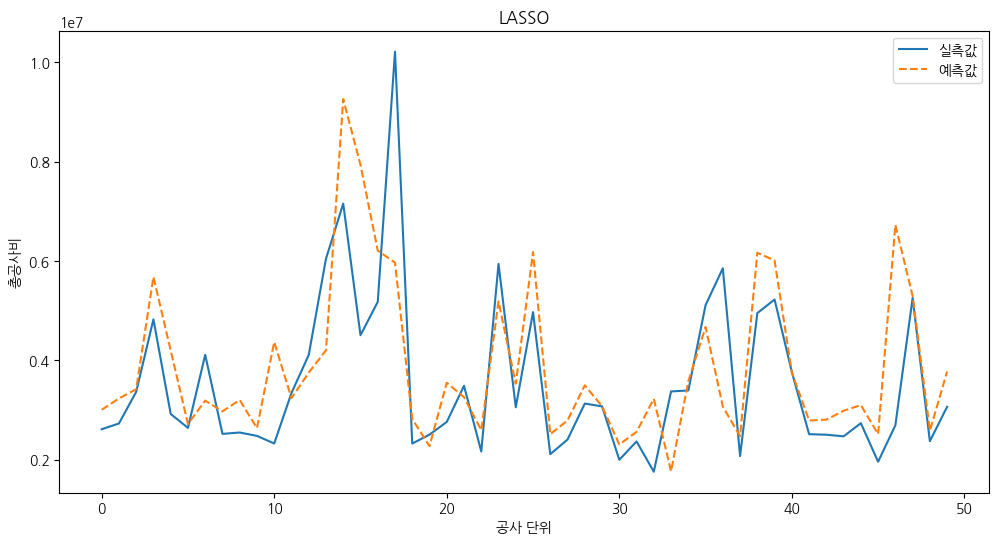

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.40669e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Evaluation: RIDGE
R2_SCORE: 0.690358, MAPE: 20.697470, MSE: 3742036152972.872559, RMSE: 1934434.323768, MAE: 987019.343055
`RIDGE` object has no attribute `feature_importances_`


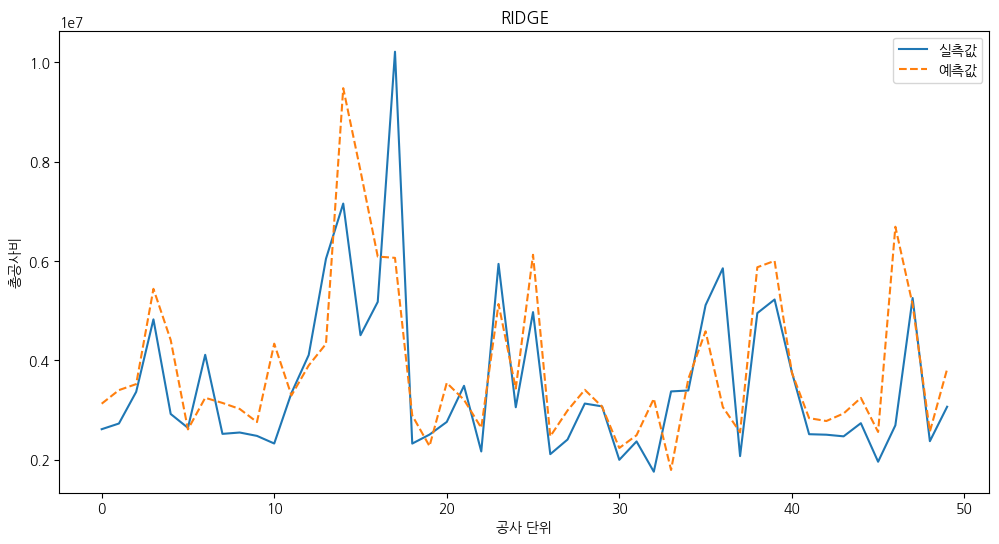

Evaluation: KNR
R2_SCORE: 0.286887, MAPE: 29.137388, MSE: 8617996446868.163086, RMSE: 2935642.424899, MAE: 1446962.808139
`KNR` object has no attribute `feature_importances_`


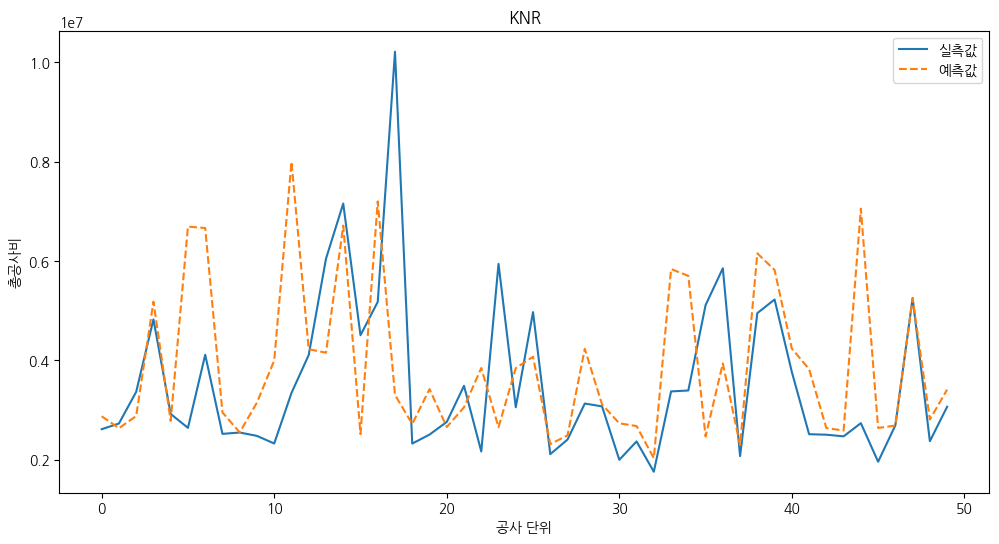

Evaluation: DTR
R2_SCORE: 0.266602, MAPE: 29.401213, MSE: 8863146930051.367188, RMSE: 2977103.782210, MAE: 1405949.577242


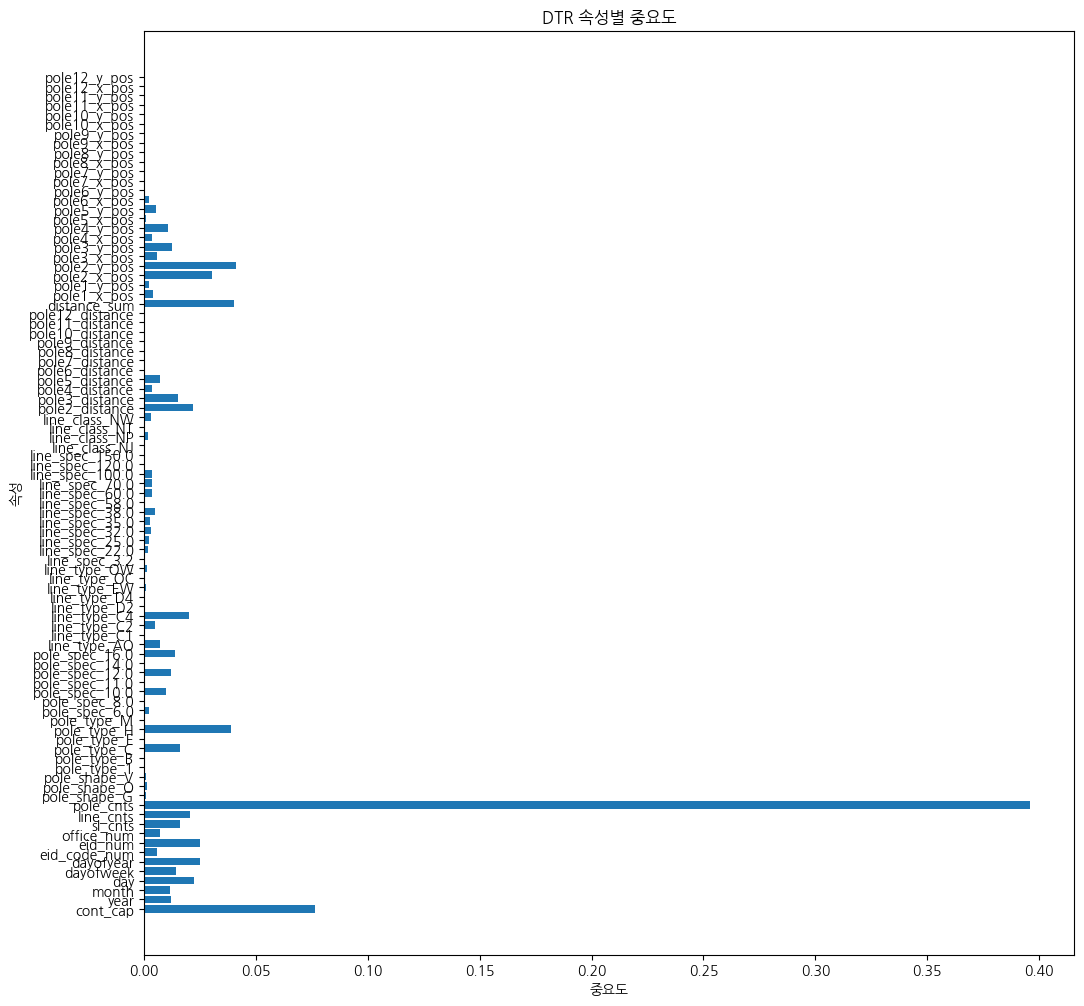

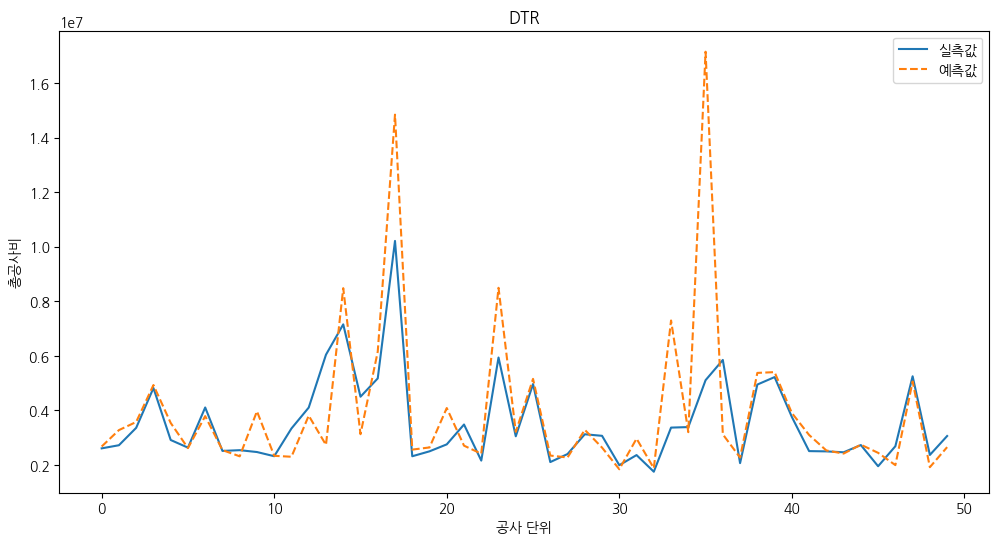

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Evaluation: RFR
R2_SCORE: 0.652162, MAPE: 21.162428, MSE: 4203639206450.093262, RMSE: 2050277.836404, MAE: 1029511.759759


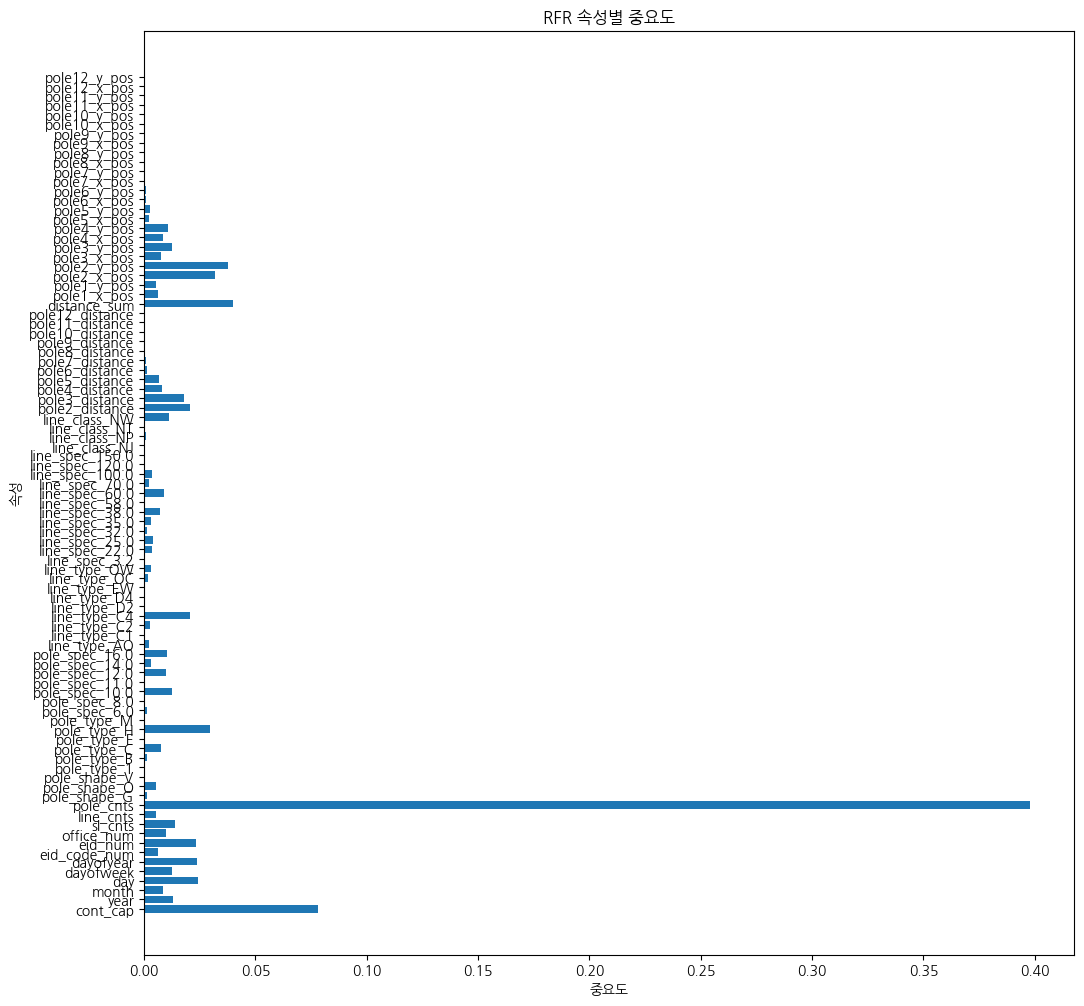

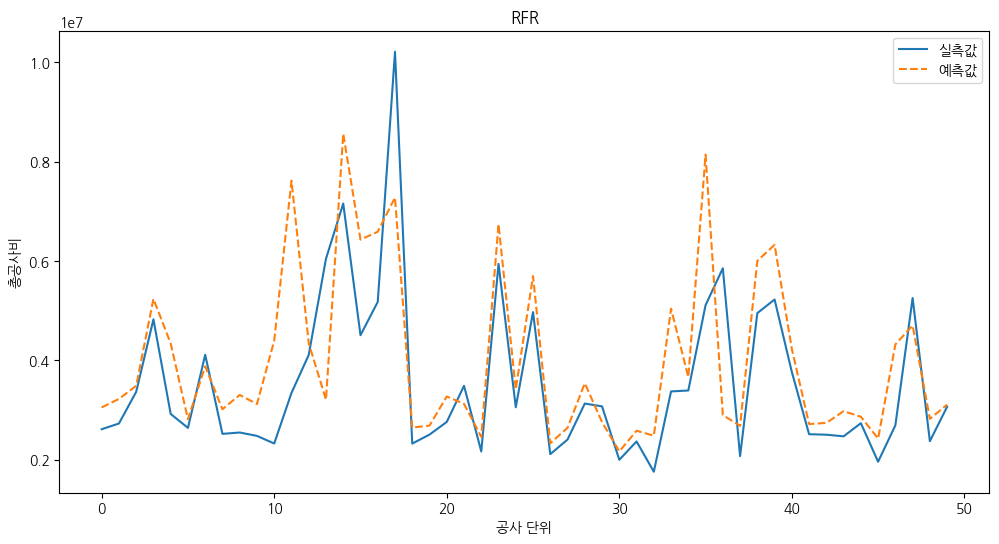

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Evaluation: GBR
R2_SCORE: 0.679494, MAPE: 20.487645, MSE: 3873322034278.072266, RMSE: 1968075.718634, MAE: 989227.354220


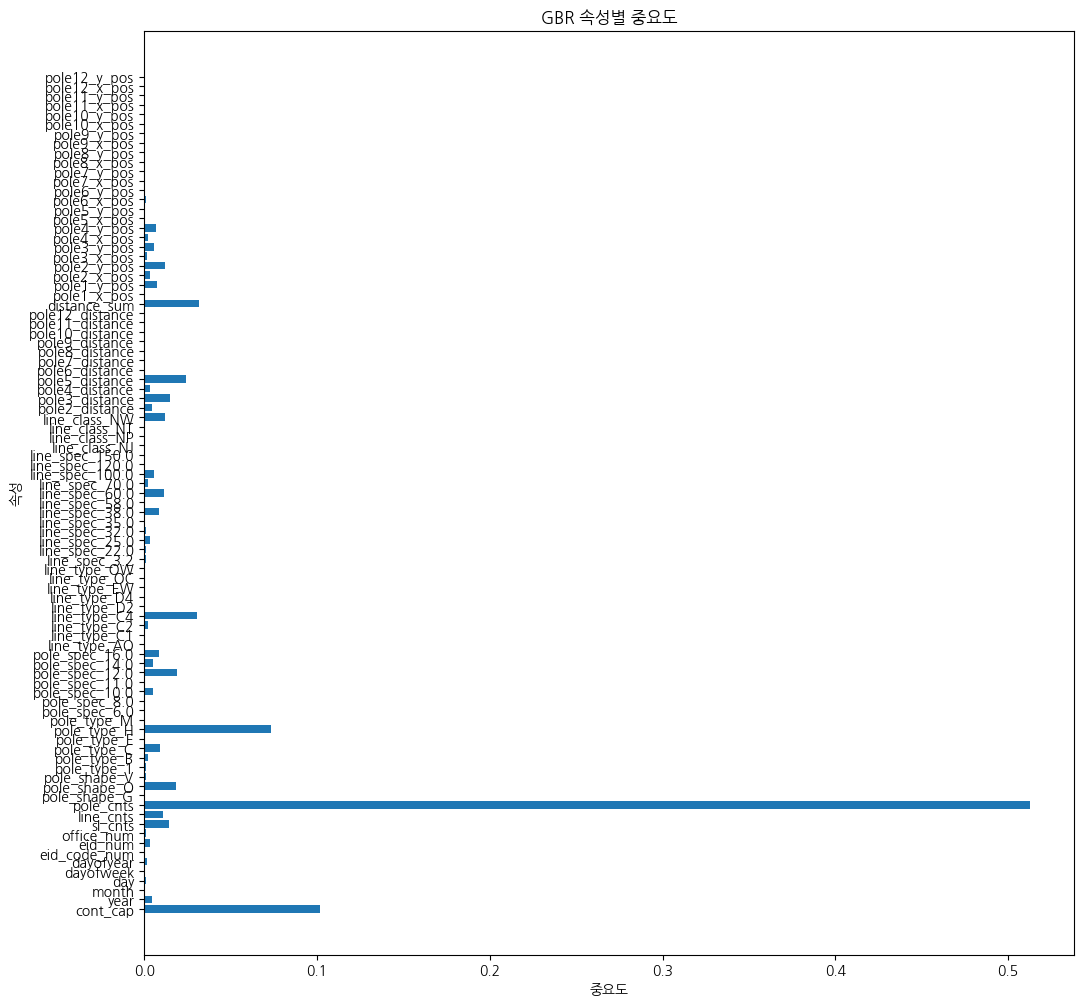

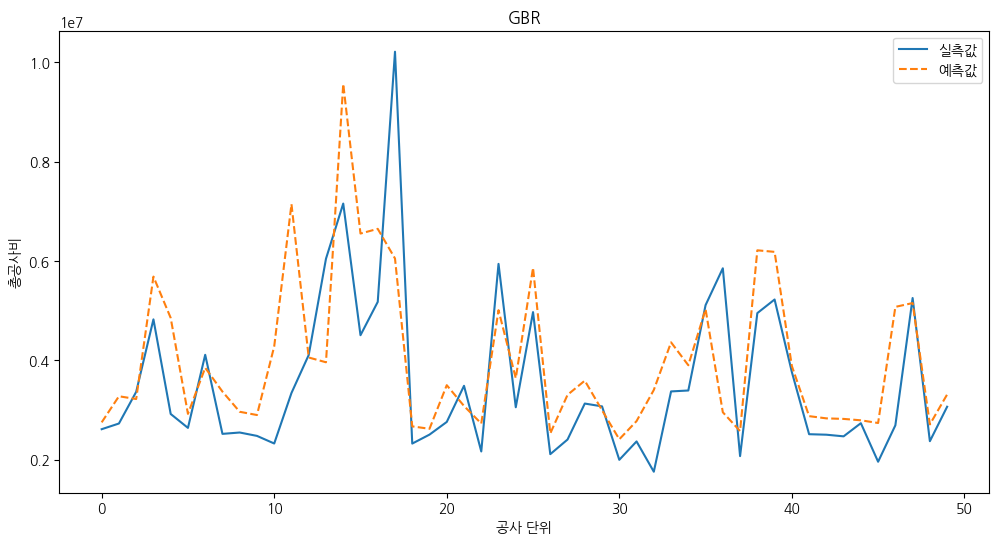

Evaluation: EN
R2_SCORE: 0.664073, MAPE: 21.651840, MSE: 4059689156063.253906, RMSE: 2014867.031857, MAE: 1023923.934851
`EN` object has no attribute `feature_importances_`


/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.600e+16, tolerance: 1.235e+13
  model = cd_fast.enet_coordinate_descent(


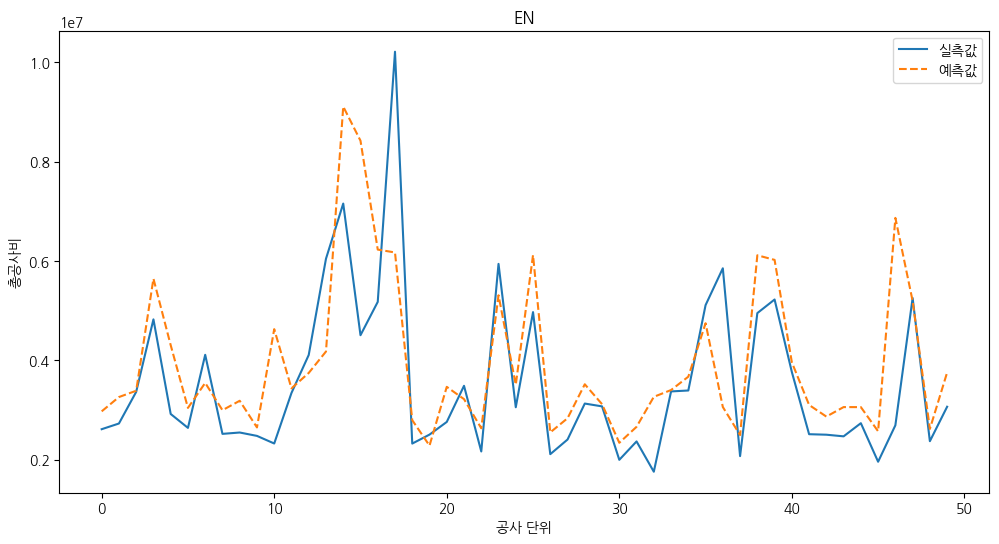

Evaluation: XGR
R2_SCORE: 0.281910, MAPE: 31.901790, MSE: 8678140206626.218750, RMSE: 2945868.328121, MAE: 1725253.094763


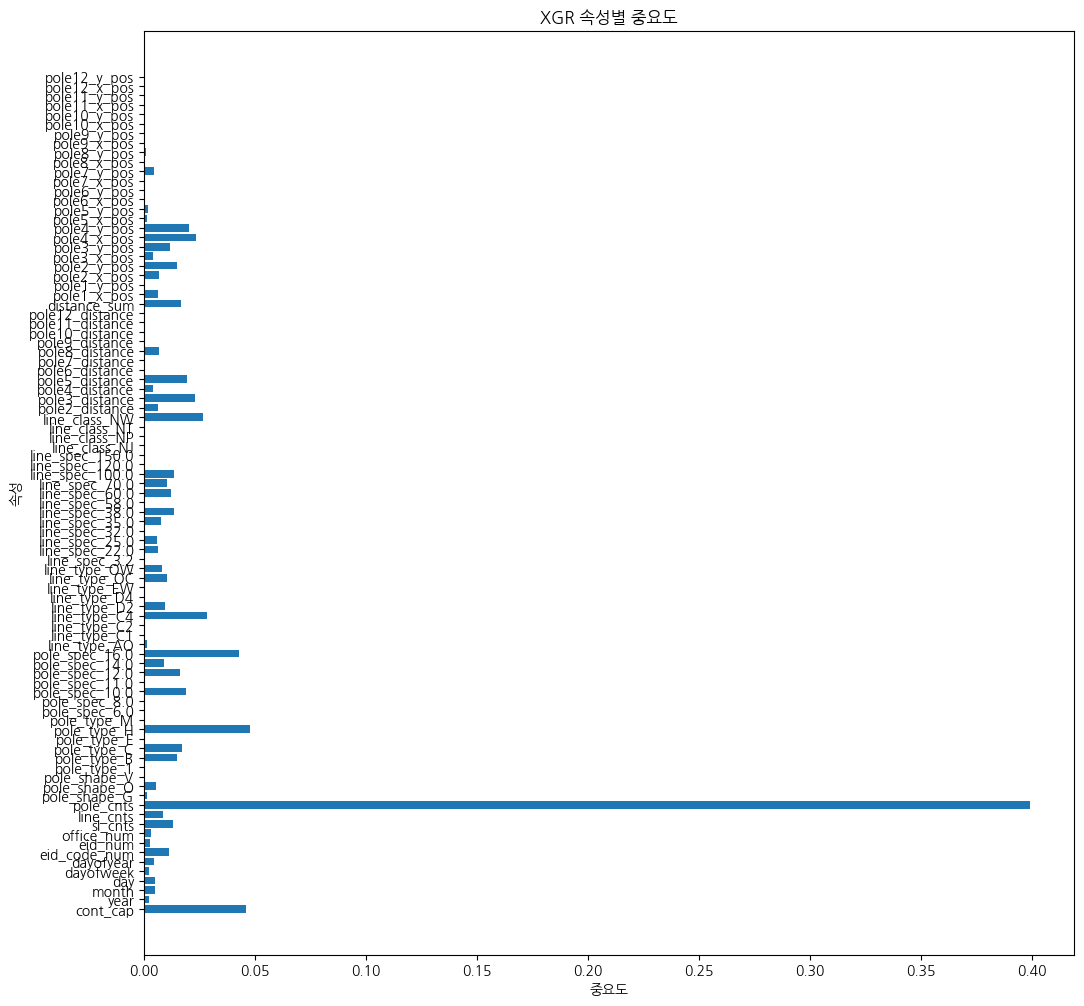

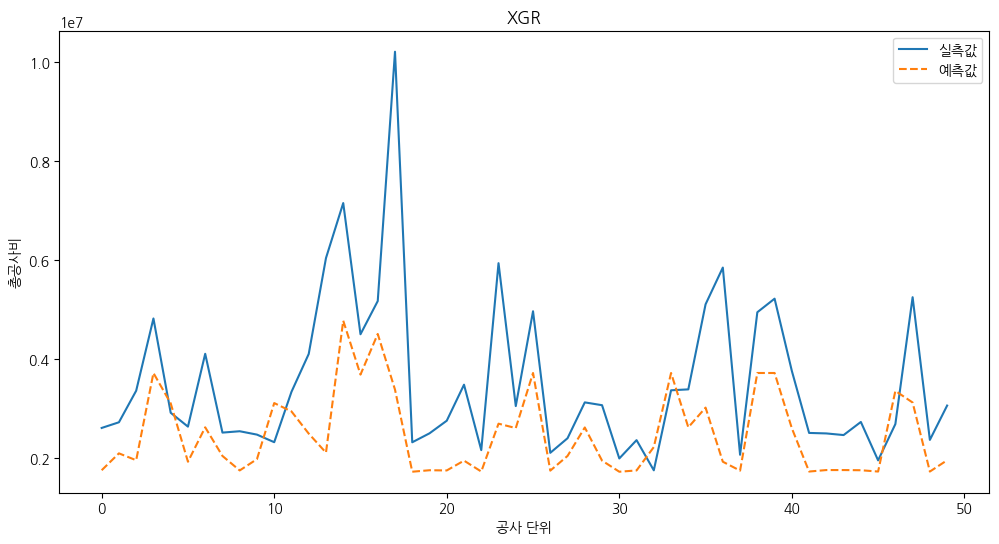

In [16]:
evaluation_values = []
model_names = []
column_names = ['r2score', 'mape', 'mse', 'rmse', 'mae']
for _model_key in ml_models.keys():
    model_fit_and_evaluation(_model_key, display_start=50, display_size=50)
    
df_evaluation = pd.DataFrame(
    evaluation_values, columns=column_names, index=model_names
)

In [17]:
df_evaluation

,r2score,mape,mse,rmse,mae
LASSO,0.687209,0.209333,3.780092e+12,1.944246e+06,9.966020e+05
RIDGE,0.690358,0.206975,3.742036e+12,1.934434e+06,9.870193e+05
KNR,0.286887,0.291374,8.617996e+12,2.935642e+06,1.446963e+06
DTR,0.266602,0.294012,8.863147e+12,2.977104e+06,1.405950e+06
RFR,0.652162,0.211624,4.203639e+12,2.050278e+06,1.029512e+06
GBR,0.679494,0.204876,3.873322e+12,1.968076e+06,9.892274e+05
EN,0.664073,0.216518,4.059689e+12,2.014867e+06,1.023924e+06
XGR,0.281910,0.319018,8.678140e+12,2.945868e+06,1.725253e+06
